<a href="https://colab.research.google.com/github/xmsi/tf2_tasks/blob/main/tf2_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

# 150 items 4 features X

(150, 4)

In [ ]:
data.target[0:100]

# only 0 and 1 in 0:100 Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data[0:100], data.target[0:100], test_size=0.33)
N, D = X_train.shape 

In [ ]:
D

4

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#tf2 works here!
import tensorflow as tf

model = tf.keras.models.Sequential([
                         tf.keras.layers.Input(shape=(D,)),
                         tf.keras.layers.Dense(1, activation='sigmoid')          
])

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 77ms/step - loss: 0.8883 - accuracy: 0.0299 - val_loss: 0.9182 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 0.8824 - accuracy: 0.0299 - val_loss: 0.9118 - val_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.8765 - accuracy: 0.0299 - val_loss: 0.9056 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.8707 - accuracy: 0.0299 - val_loss: 0.8993 - val_accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 18ms/step - loss: 0.8649 - accuracy: 0.0448 - val_loss: 0.8930 - val_accuracy: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 0.8592 - accuracy: 0.0597 - val_loss: 0.8868 - val_accuracy: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.8534 - accuracy: 0.0597 - val_loss: 0.8804 - val_accuracy: 0.0

In [ ]:
print('Train score', model.evaluate(X_train,y_train))
print('Test score', model.evaluate(X_test,y_test))

3/3 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 1.0000
Train score [0.27239447832107544, 1.0]
2/2 [==============================] - 0s 7ms/step - loss: 0.2549 - accuracy: 1.0000
Test score [0.2549431025981903, 1.0]


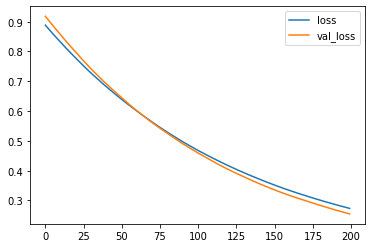

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label ='val_loss')
plt.legend()

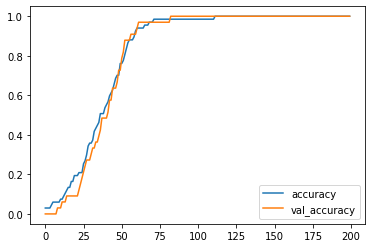

In [ ]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label ='val_accuracy')
plt.legend()